# E-handel: Snabbrapport

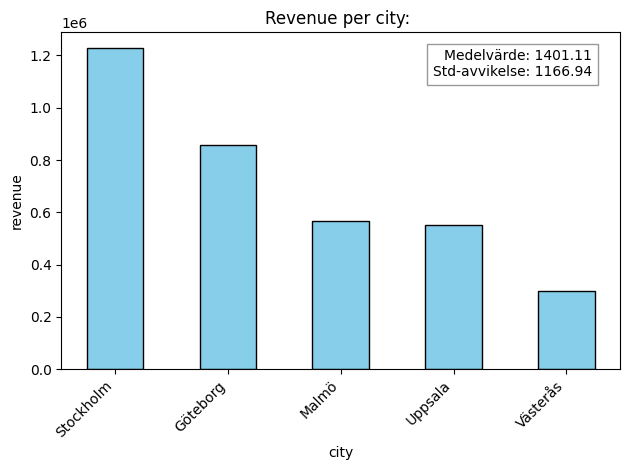


Alla städer och intäkt: 
        city     revenue
0  Stockholm  1227201.94
1   Göteborg   859019.65
2      Malmö   567926.32
3    Uppsala   551478.42
4   Västerås   297140.90

Medelintäkt: 1401.11
Standardavvikelse: 1166.94
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = "/Users/lindahansson/Desktop/Gruppuppgift_1/data/ecommerce_sales.csv"

df = pd.read_csv(CSV_PATH) 
df.columns = df.columns.str.strip()  # remove whitepaces

def revenue_per_city(csv_path=CSV_PATH):  # function to calculate total revenue per city
    city_revenue = (
        df.groupby('city')['revenue']     # gorup data by city
            .sum()                        # sum revenue values
            .sort_values(ascending=False) # sort result decending
    )
    return city_revenue, df

if __name__ == "__main__": 
    city_rev, df = revenue_per_city()     # Get revenue by city and DataFrame
    city_rev_df = city_rev.reset_index()  # convert Series to df

    mean_revenue = df['revenue'].mean()   # calculate mean revenue
    std_revenue = df['revenue'].std()     # calculate standard deviation of revenue

    fig, ax = plt.subplots()              # create figure and axis for the bar chart
    ax.bar(city_rev_df['city'], city_rev_df['revenue'], color='skyblue',  width=0.5, edgecolor='black')
    ax.text(                              # text box showing mean and standard deviation
        0.95, 0.95,
        f"Medelvärde: {mean_revenue:.2f}\nStd-avvikelse: {std_revenue:.2f}",
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
    )
    # plot titles and axis labels
    ax.set_title('Revenue per city: ')
    ax.set_xlabel('city')
    ax.set_ylabel('revenue')

    # set tick positions and rotate labels for readability
    ax.set_xticks(range(len(city_rev_df['city'])))
    ax.set_xticklabels(city_rev_df['city'], rotation=45, ha='right') 

    fig.tight_layout()                    # adjust layout to prevent label overlap
    plt.show()                            # display the chart

    # print summary statistics and data types
    print("\nAlla städer och intäkt: ")
    print(city_rev_df)
    print(f"\nMedelintäkt: {mean_revenue:.2f}")
    print(f"Standardavvikelse: {std_revenue:.2f}")   
    print(type(city_rev))  
    print(type(df))   

  



